In [1]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import numpy as np
import timeit
import itertools
import importlib
import os
import glob
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Dataset = 'Ocean1'
Oc_mod_type = 'COM_NEMO-CNRS'
Bet_path = '/bettik/bouissob/'
D_path = os.path.join(Bet_path, 'Method_Data/COM_NEMO-CNRS/Method_4', 'Ocean4.csv')

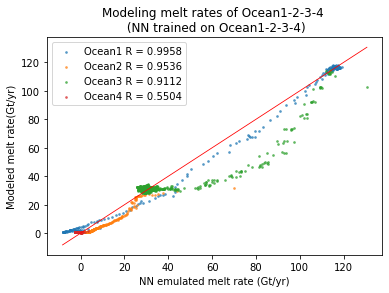

5.208528703430791


In [21]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
            message = 0, Ocean_target = OcT, index = 1, NN_attributes = {'Epoch' : 8, 
                                                'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Neur' : '0'})

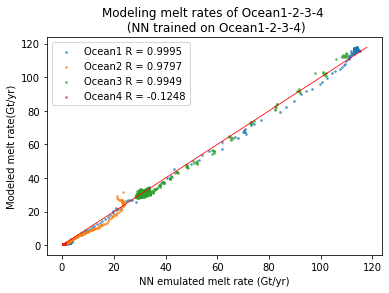

[[1.         0.99915848]
 [0.99915848 1.        ]]


In [23]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = True, Save_name = 'Method3',
            message = 0, Ocean_target = OcT, index = 1, NN_attributes = {'Epoch' : 8, 
                                                'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Method_data' : 3})

def Hyp_param_list(Ind, Max):
    List =['1', '4', '8','16', '32', '64', '96', '128']
    string = []
    Possible = List[min(6, 3 * Ind + int(Max)) :min(int(Max/ 1.5) + 3 + 2 * Ind, len(List))]
    if Ind == Max:
        return Possible
    else:
        Next = Hyp_param_list(Ind + 1, Max)
        return ['_'.join([j, i]) for i in Next for j in Possible]
li = []
for i in range(3):
    li.extend(Hyp_param_list(0, i))
li

In [94]:
def Verify_string_tuple(Seqs, extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128']
    seqsT = list(Seqs)
    Min = int(Seqs[0][0])
    for ind, seq in enumerate(Seqs):
        removed = 0
        int_list = [int(i) for i in seq]
        Max = int_list[0]
        for ints in int_list:
            if ints<Max:
                seqsT.remove(seq)
                removed = 1
                break
            else:
                Max = ints
        if extent >= 3 and removed == 0:
            if int_list.count(Min) < int(extent)/2 and int_list.count(Min)!=0:
                seqsT.remove(seq)
    return seqsT
            
def Hyp2(Extent):
    List = ['1', '4', '8','16', '32', '64', '96', '128'] 
    li = List[min(Extent-1 + int(Extent/2), min(len(List)-2, len(List) - 4 + int(Extent/5))):Extent + 3 + int(2/Extent) + int(Extent/5)]
    permut = list(itertools.product(li, repeat = Extent))
    Seq = Verify_string_tuple(permut, Extent)
    return ['_'.join(i) for i in Seq]

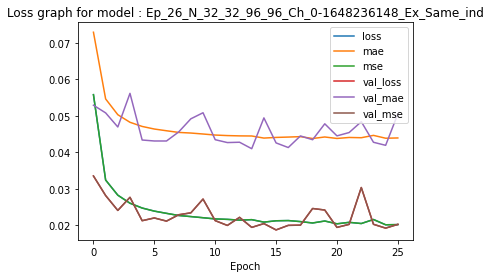

In [3]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 26, Ocean = OcT, Neur = '32_32_96_96', 
                         Drop = '', Extra_n = 'Same_ind') 

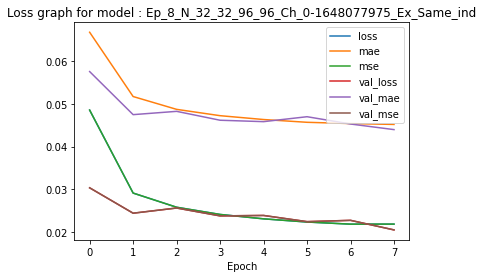

In [3]:
Plotting.Plot_loss_model(save = False, ind = 0, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Method_data = 4) 

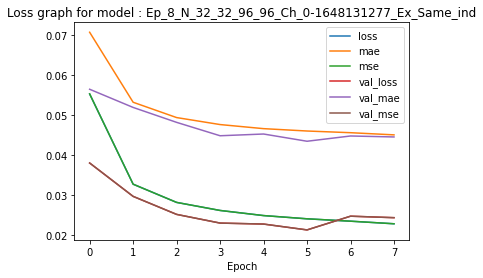

In [4]:
Plotting.Plot_loss_model(save = True, ind = 1, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Method_data = 4) 

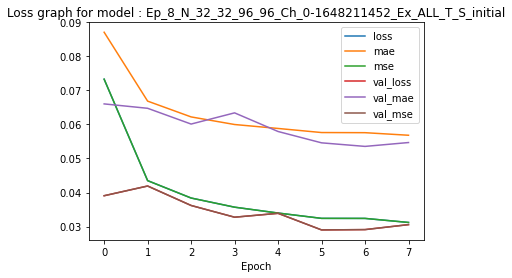

In [5]:
Plotting.Plot_loss_model(save = True, ind = 1, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Method_data = 4, Extra_n = 'ALL_T_S_initial') 

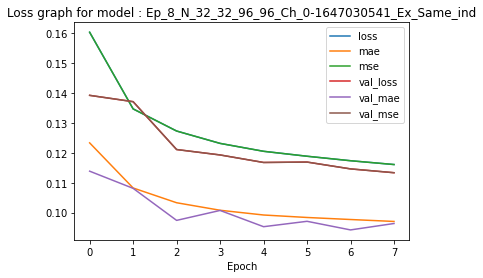

In [18]:
Plotting.Plot_loss_model(save = True, ind = 1, Epoch = 8, Ocean = OcT, Neur = '32_32_96_96', Method_data = '') 

In [ ]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, message = 0, 
    Ocean_target = OcT, NN_attributes = {'Epoch':8, 'Neur' : '64_64_64_96_96', 'Extra_n' : 'Same_ind', 'Ocean':OcT},index = 0, Compute_at_ind = True)

Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind
Starting 1/1 model Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind


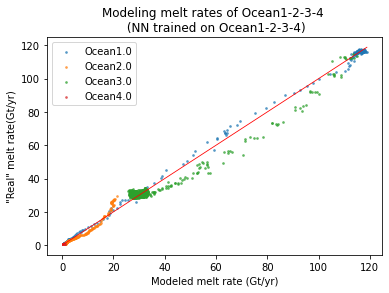

In [11]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = False, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                                                        'Extra_n' : 'Same_ind'}, Compute_at_ind = False)

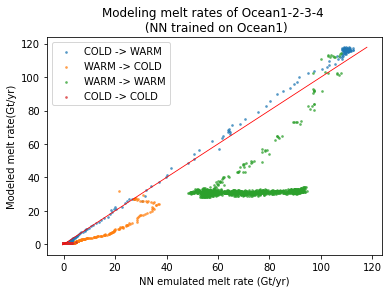

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526567.png


In [45]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

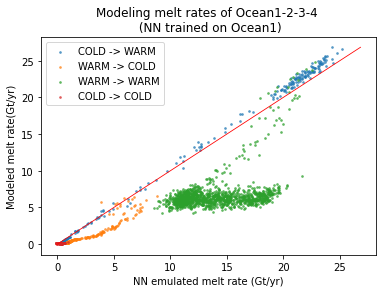

64_64_64_96_96_TrOcean1_TarOcean1-2-3-4_1647526618.png


In [46]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = 'Ocean1', message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = True)

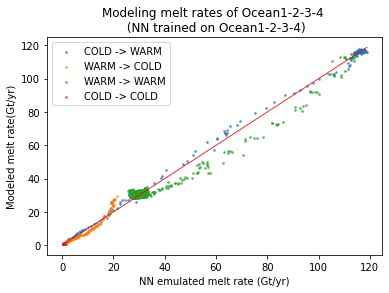

64_64_64_96_96_TrOcean1-2-3-4_TarOcean1-2-3-4_1647526690.png


In [47]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = False)

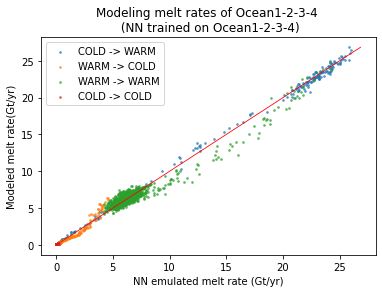

64_64_64_96_96_TrOcean1-2-3-4_TarOcean1-2-3-4_1647526741.png


In [48]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(save = True, Epoch = 8, 
                Ocean_trained = OcT, message = 0, Ocean_target = OcT, NN_attributes = {'Neur' : '64_64_64_96_96', 
                'Extra_n' : 'Same_ind', 'Exact' : 1, 'Var' : Var_X_non_position}, Compute_at_ind = True)

In [38]:
Dict = {'Ocean1' : 'COLD -> WARM', 'Ocean2' : 'WARM -> COLD', 'Ocean3' : 'WARM -> WARM', 'Ocean4' : 'COLD -> COLD'}

In [43]:
Dict['Ocean1']

'COLD -> WARM'

In [5]:
Trainings.Get_model_path_json(Epoch = 8, Method_data = 4, Ocean = OcT)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind']

In [6]:
p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648077975_Ex_Same_ind'
df = pd.read_pickle(f"{p}/MeanX.pkl")

In [12]:
df['T_9']

-1.7803756156184123

In [5]:
#/Ocean1/Ep_1_N_32_32_96_96_Ch_0-1648130463_Ex_Same_ind/

In [15]:
p = '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_1_N_32_32_96_96_Ch_0-1648131052_Ex_Same_ind'
df = pd.read_pickle(f"{p}/MeanX.pkl")
df = pd.read_pickle(f"{p}/StdX.pkl")

In [16]:
df['T_0']

2.7814417155464626

In [17]:
df['T_23']

2.7814417155464626